In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 3s 0us/step


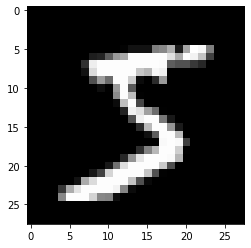

In [3]:
plt.imshow(x_train[0], cmap='gray') # imshow() function which simply displays an image.
plt.show() 

In [4]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255 # Each image has Intensity from 0 to 255
x_test /= 255


In [7]:
num_classes = 10
y_train = np.eye(num_classes)[y_train] 
y_test = np.eye(num_classes)[y_test] 

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) #returns a sequence of another vectors of dimension 512
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', # for a multi-class classification problem
optimizer=RMSprop(),
metrics=['accuracy'])
# Train the model
batch_size = 128 # batch_size argument is passed to the layer to define a batch size for the inputs.
epochs = 20
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1, validation_data=(x_test, y_test)) #

Epoch 1/20
469/469 [==============================] - 10s 20ms/step - loss: 0.2534 - accuracy: 0.9222 - val_loss: 0.1271 - val_accuracy: 0.9594
Epoch 2/20
469/469 [==============================] - 10s 20ms/step - loss: 0.1052 - accuracy: 0.9675 - val_loss: 0.0853 - val_accuracy: 0.9735
Epoch 3/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0745 - accuracy: 0.9769 - val_loss: 0.0746 - val_accuracy: 0.9783
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0585 - accuracy: 0.9814 - val_loss: 0.0635 - val_accuracy: 0.9814
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0477 - accuracy: 0.9841 - val_loss: 0.0678 - val_accuracy: 0.9820
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0398 - accuracy: 0.9873 - val_loss: 0.0651 - val_accuracy: 0.9823
Epoch 7/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0594 - val_accuracy: 0.9

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09151685237884521
Test accuracy: 0.9842000007629395
